<a href="https://colab.research.google.com/github/swayangshreesamal/volatility-risk-forecasting/blob/main/01_nifty50_data_loading_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Market Data Collection and Volatility Foundations

## Objective
This notebook focuses on collecting historical market price data
and building the foundational volatility features required for
risk analysis and forecasting.

We start from raw price data and progressively move toward
log returns and rolling volatility calculations.


## Step 1: Environment Setup

In this step, we:
- Import required Python libraries
- Mount Google Drive to save and load datasets
- Prepare the environment for financial data analysis

## Step 2: Market Data Acquisition

We fetch historical market data for the selected index.
This dataset includes daily price information such as:
- Open
- High
- Low
- Close
- Volume

This raw data will be used to derive volatility and risk features.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = yf.download("^NSEI",start="2005-01-01")
df.to_csv("NSEI.csv")
df.head()

Mounted at /content/drive


/tmp/ipython-input-2873069478.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("^NSEI",start="2005-01-01")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI
Date,,,,,
2007-09-17,4494.649902,4549.049805,4482.850098,4518.450195,0
2007-09-18,4546.200195,4551.799805,4481.549805,4494.100098,0
2007-09-19,4732.350098,4739.000000,4550.250000,4550.250000,0
2007-09-20,4747.549805,4760.850098,4721.149902,4734.850098,0
2007-09-21,4837.549805,4855.700195,4733.700195,4752.950195,0


## Initial Data Inspection

We inspect the first few rows to confirm:
- Correct date indexing
- Presence of price columns
- Data consistency

At this stage, no transformations are applied.


## Step 3: Log Return Calculation

Instead of using raw prices, financial models typically use log returns.

Log returns are preferred because:
- They handle percentage changes correctly
- They are additive over time
- They are suitable for volatility modeling

We compute daily log returns using closing prices.


In [ ]:
df.columns=df.columns.get_level_values(0)
df['log_return']=np.log(df['Close']/df['Close'].shift(1))

df[['Close','log_return']].head()


Price,Close,log_return
Date,,
2007-09-17,4494.649902,NaN
2007-09-18,4546.200195,0.011404
2007-09-19,4732.350098,0.040130
2007-09-20,4747.549805,0.003207
2007-09-21,4837.549805,0.018780


## Log Return Validation

The log return values represent daily price movement intensity.
These values form the base input for all volatility calculations
in later steps.


## Step 4: Rolling Volatility Calculation

Volatility measures how much prices fluctuate over time.

We compute rolling volatility using a fixed window
to capture recent market uncertainty.
A 14-day window is used as a standard short-term risk indicator.


In [ ]:
df['volatility_14d']=df['log_return'].rolling(window=14).std()
df=df.dropna()
df[['log_return','volatility_14d']].head()

Price,log_return,volatility_14d
Date,,
2007-10-08,-0.019619,0.014705
2007-10-09,0.046520,0.017841
2007-10-10,0.021210,0.016125
2007-10-11,0.015211,0.016056
2007-10-12,-0.017639,0.017550


## Volatility Interpretation

Higher volatility values indicate unstable or risky market periods,
while lower values suggest calmer market conditions.

This feature is crucial for detecting risk regimes.


## Step 5: Volatility Visualization

Plotting volatility over time helps us visually identify:
- Risk spikes
- Calm phases
- Structural market changes

Visualization provides intuition before applying machine learning.


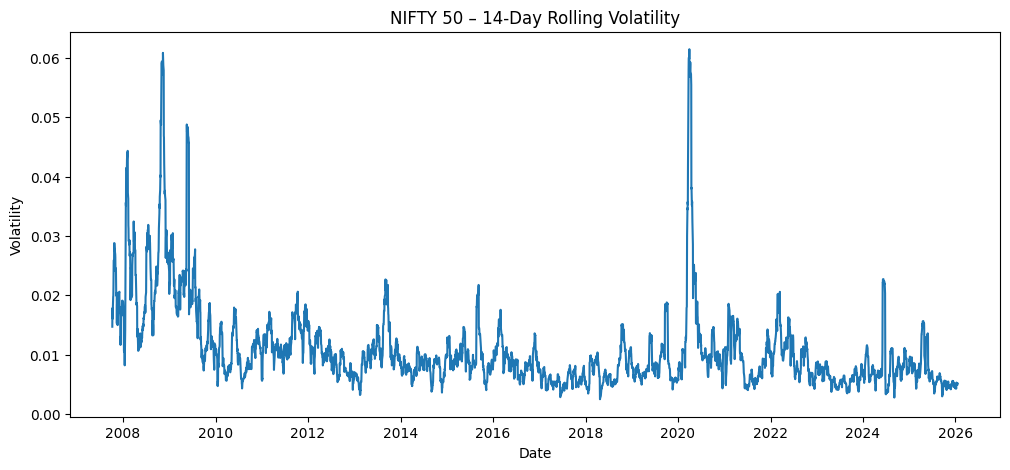

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(df.index,df['volatility_14d'])
plt.title("NIFTY 50 – 14-Day Rolling Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.show()

## Step 6: Multi-Horizon Volatility Features

Market risk behaves differently across time horizons.
To capture this, we compute rolling volatility over multiple windows:
- 7-day (short-term)
- 14-day (medium-term)
- 30-day (long-term)

These features improve downstream regime classification.


In [ ]:
df['vol_7d']=df['log_return'].rolling(window=7).std()
df['vol_14d']=df['log_return'].rolling(window=14).std()
df['vol_30d']=df['log_return'].rolling(window=30).std()
df=df.dropna()
df[['log_return','vol_7d','vol_14d','vol_30d']].head()

Price,log_return,vol_7d,vol_14d,vol_30d
Date,,,,
2007-11-19,0.000135,0.019599,0.014979,0.022943
2007-11-20,-0.021689,0.020814,0.016008,0.023020
2007-11-21,-0.038772,0.025526,0.018750,0.022889
2007-11-22,-0.007527,0.024657,0.018767,0.022633
2007-11-23,0.016041,0.017523,0.019118,0.022652


## Step 7: Save Processed Features

The processed dataset is saved as a CSV file.
This file will be used in subsequent notebooks
for risk regime modeling and machine learning.


In [ ]:
df.to_csv(
    "/content/drive/My Drive/volatility-risk-forecasting/DATA/PROCESSED/nifty50_processed.csv"
)
